# **Project Title**

## **Abstract**

Non-coding RNA (ncRNA) molecules play essential roles in the existence of life. In other words, without these ribonucleic acid chains, life would not be possible. For example, ncRNAs are involved in gene translation into proteins and the regulation of gene expression. Knowing the class of ncRNAs allows us to infer their functions.

However, the exploration of deep learning techniques to improve ncRNA identification is still in its early stages. In this project, I propose to develop various deep learning models and transformations, progressing from simple to more complex architectures, to classify ncRNAs based on their primary structure (sequence) using the Rfam database—one of the most comprehensive repositories of manually curated RNA sequences.

To evaluate the models, I will use performance metrics such as accuracy, sensitivity, specificity, precision, and F-score, comparing the results both within this study and with findings from the literature. The main challenge lies in the possibility that RNA classification may not rely entirely on its primary structure, which could limit the model’s performance.



## **Introduction**

The classification of ncRNAs is essential in genetic research to infer their roles in various biological processes, understand their functions, and develop new treatments for illnesses such as cancer.

We can identify different classes of ncRNAs (Fiannaca et al., 2017; Zhang et al., 2021).

- **miRNA** (MicroRNA) – Small ncRNA molecules that regulate gene expression. They can act as oncogenes by suppressing tumor suppressors or as tumor suppressors by downregulating oncogenes.
- **snRNA** (Small Nuclear RNA) – Involved in the processing of pre-mRNA, mainly functioning within the spliceosome.
- **snoRNA** (Small Nucleolar RNA) – A subclass of snRNA that modifies rRNA and is linked to cancer progression, - such as snoRNA U50 in breast cancer.
- **lncRNA** (Long Non-Coding RNA) – ncRNA longer than 200 nucleotides with roles in gene regulation. Dysregulated - lncRNAs are associated with cancer and may serve as prognostic markers.
- **siRNA** (Silencing RNA) – Short double-stranded RNA molecules that mediate RNA interference (RNAi) to degrade target mRNA and suppress gene expression.
- **tRNA** (Transfer RNA) – Essential for protein synthesis, tRNA carries amino acids to the ribosome and ensures proper translation of mRNA into proteins.
- **Riboswitches** – Structured ncRNA domains that bind metabolites and regulate gene expression without protein involvement, indicating a key role in gene regulation.
- **IRES** (Internal Ribosome Entry Sites) – RNA elements that enable translation initiation independently of the 5' cap, playing a role in stress responses and viral translation.


The main goal of this project is to determine the class to which a given ncRNA belongs. Additionally, an attempt will be made to distinguish non-coding RNAs from the broader group of RNAs. However, for this project, some classes may be grouped together, or the dataset may be extended as needed.

This is a classification problem, and various techniques learned during the course will be applied to address it. The process will begin with a simple logistic regression model, followed by the implementation of more complex CNN and RNN models. In a practical and simplified manner, this task can be compared to identifying a cat or a dog in an image or recognizing a number—similar to how CNNs have been used—or to the exercise in Lab 5: “Does it contain ones?” (RNN). However, the complexity of the problem and the numerous possible combinations of these tools will be explored further.

Beyond the model itself, different data transformations can also be experimented with. As discussed with the TA, the sequence could be transformed into a one-hot encoded matrix, or the bases (letters of the sequence) could be grouped into sets of two, three, etc.
	


In this section, you can add **text** and **figures**.

## **Methodology**
Describe the important steps you took to achieve your goal. Focus more on the most important steps (preprocessing, extra features, model aspects) that turned out to be important. Mention the original aspects of the project and state how they relate to existing work.

In this section, you can add **text** and **figures**. For instance, it is strongly suggested to add a picture of the best machine learning model that you implemented to solve your problem (and describe it).

Data ProcessingTo facilitate classification, RNA sequences are preprocessed using various transformation techniques. Two primary approaches are considered:

- One-hot encoding: Each nucleotide in the sequence is represented as a binary vector.

- K-mer encoding: Sequences are transformed into overlapping substrings (k-mers) of length two, three, or more, capturing sequence dependencies.

These transformations allow the models to capture essential sequence features relevant for classification.


## **Experimental Setup**
Describe the datasets used for your experiments. List the machine learning techniques used to solve your problem and report the corresponding hyperparameters.
In this section, you can add **text**, **tables**, and **figures**.


For the dataset, I will use a subset of Rfam, one of the most comprehensive repositories of manually curated RNA sequences. This selection was made by Fiannaca et al. (2017).

As shown in the image below, each RNA sequence starts with an identifier after the < symbol, followed by a space and the RNA class, then the sequence itself. Therefore, preprocessing is required. The dataset is already divided into 6,320 ncRNA FASTA sequences for training and two validation datasets, consisting of 2,600 and 2,400 ncRNA FASTA sequences, respectively. However, I may create other distribution of the sets. 

https://github.com/IcarPA-TBlab/nrc/tree/master?tab=readme-ov-file




![DataSet Example](datafiles/printscreendata.jpeg)

![DataSet Example](datafiles/Fiannaca_et_al_2017.png)

Fiannaca et al. 2017

## **Experimental Results**
Describe here the main experimental results. Critically discuss them. Compare them with results available in the literature (if applicable).

In this section, you can add **text** and **figures**, **tables**, **plots**, and **code**. Make sure the code is runnable and replicable.

In [1]:
#Library installation
!pip install biopython
!pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [99]:
# Libraries load
import importlib
import datasetsnc.dataclasses 
import modelsnc.modelclasses
import algorithms.runclass
from datasetsnc.dataclasses import * 
from modelsnc.modelclasses import *
from algorithms.runclass import * 
importlib.reload(datasetsnc.dataclasses)
importlib.reload(modelsnc.modelclasses)
importlib.reload(algorithms.runclass) 



<module 'algorithms.runclass' from '/home/emilio/PycharmProjects/comp6841final/algorithms/runclass.py'>

In [100]:
# fasta file location
nc_file = "datafiles/dataset_Rfam_6320_13classes.fasta"

In [101]:
# create a data class
nc_set = NcRnaDataset(nc_file)



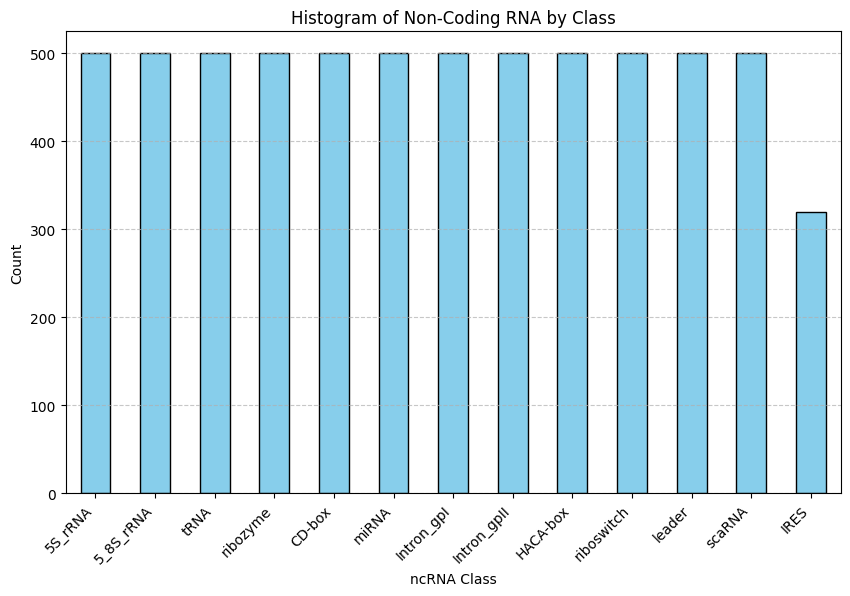

<module 'matplotlib.pyplot' from '/home/emilio/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [102]:
#plot distribution of non-coding RNA by class
nc_set.hist_nc_class()

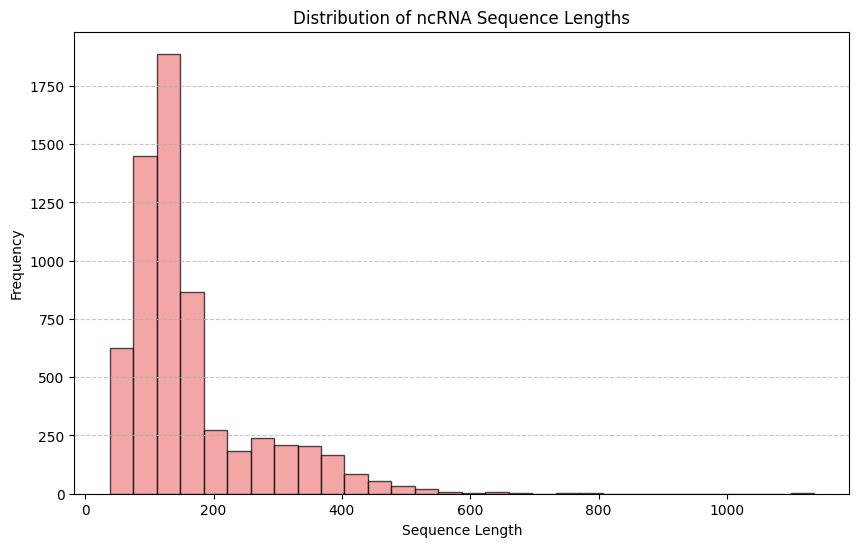

<module 'matplotlib.pyplot' from '/home/emilio/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [103]:
#plot distribution of non-coding RNA lenghts
nc_set.dist_nc_len()



In [104]:
#Overfitting test with a simple model and 1500 samples. I started with 30

seq_size = 160
simpleModel = SimpleLinear(input_size=seq_size*4)
rclass = ImplementDLEv(fastafile=nc_file, batch_size=2,num_workers=1, 
                 model = simpleModel, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=0.001, num_epochs = 3, seq_length = seq_size,
                 subset = 1500,chkpoint=True, chkpath = "chkpoints/")

rclass.print_settings()

rclass.run_train()

************************************************
Model Hyperparameters and Configuration Settings
------------------------------------------------
fastafile: datafiles/dataset_Rfam_6320_13classes.fasta
batch_size: 2
num_workers: 1
model: SimpleLinear(
  (fc): Linear(in_features=640, out_features=14, bias=True)
)
device: cpu
train_ratio: 0.7
val_ratio: 0.15
test_ratio: 0.15
lr: 0.001
num_epochs: 3
seq_length: 160
subset: 1500
chkpoint: True
chkpath: chkpoints/


Run Information
---------------
Epoch 1/3, Loss: 0.3176, Avg Batch Time: 0.0017s
Validation Loss: 0.1098, Validation Accuracy: 0.9733
Validation Class Accuracy:  [0, 0.971, 0.988, 0.96, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Epoch 2/3, Loss: 0.0541, Avg Batch Time: 0.0017s
Validation Loss: 0.0772, Validation Accuracy: 0.9689
Validation Class Accuracy:  [0, 0.971, 0.976, 0.96, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Epoch 3/3, Loss: 0.0298, Avg Batch Time: 0.0017s
Validation Loss: 0.0737, Validation Accuracy: 0.9733
Validation Class Accuracy:  [0, 

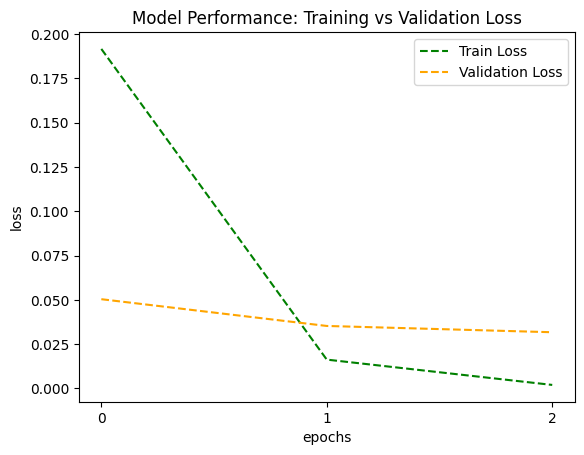

In [108]:
rclass.performance_plot()


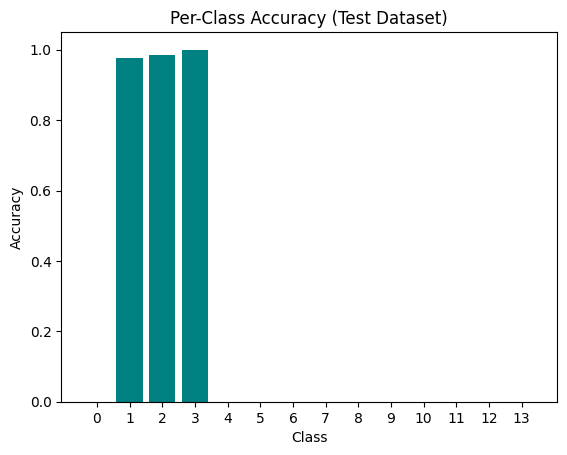

In [109]:
rclass.accuracy_x_class_plot()

In [110]:
#Overfitting test with a simple MLP model and 1500 samples. I started with 30

seq_size = 160
simpleMLPmodel = SimpleMLP(input_size=seq_size*4)
rclass = ImplementDLEv(fastafile=nc_file, batch_size=2,num_workers=1, 
                 model = simpleMLPmodel, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=0.001, num_epochs = 3, seq_length = seq_size,
                 subset = 1500)

rclass.run_train()


Run Information
---------------
Epoch 1/3, Loss: 0.1852, Avg Batch Time: 0.0030s
Validation Loss: 0.0631, Validation Accuracy: 0.9822
Validation Class Accuracy:  [0, 0.987, 0.976, 0.985, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Epoch 2/3, Loss: 0.0065, Avg Batch Time: 0.0031s
Validation Loss: 0.0814, Validation Accuracy: 0.9822
Validation Class Accuracy:  [0, 0.987, 0.963, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Epoch 3/3, Loss: 0.0013, Avg Batch Time: 0.0031s
Validation Loss: 0.0748, Validation Accuracy: 0.9778
Validation Class Accuracy:  [0, 0.987, 0.963, 0.985, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Final Test Accuracy: 0.9867
Final Test Class Accuracy:  [0, 1.0, 0.972, 0.986, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 



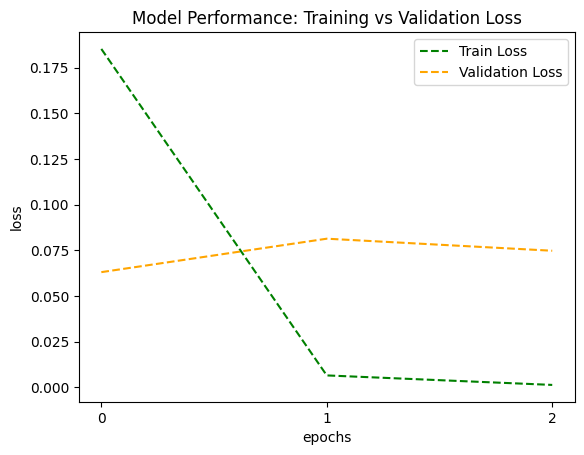

In [111]:
rclass.performance_plot()

In [112]:
seq_size = 119
simpleModel = SimpleLinear(input_size=seq_size*4)
rclass = ImplementDLEv(fastafile=nc_file, batch_size=128,num_workers=1, 
                 model = simpleModel, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=0.001, num_epochs = 10, seq_length = seq_size,
                 subset = 0)

rclass.run_train()


Run Information
---------------
Epoch 1/10, Loss: 2.3483, Avg Batch Time: 0.0022s
Validation Loss: 2.0626, Validation Accuracy: 0.4557
Validation Class Accuracy:  [0, 0.618, 0.847, 0.861, 0.237, 0.38, 0.188, 0.434, 0.882, 0.228, 0.31, 0.045, 0.446, 0.294]
Epoch 2/10, Loss: 1.8282, Avg Batch Time: 0.0024s
Validation Loss: 1.7287, Validation Accuracy: 0.5443
Validation Class Accuracy:  [0, 0.737, 0.847, 0.931, 0.412, 0.535, 0.234, 0.526, 0.934, 0.203, 0.379, 0.159, 0.566, 0.471]
Epoch 3/10, Loss: 1.5376, Avg Batch Time: 0.0023s
Validation Loss: 1.5336, Validation Accuracy: 0.6013
Validation Class Accuracy:  [0, 0.737, 0.847, 0.931, 0.5, 0.451, 0.438, 0.618, 0.934, 0.418, 0.552, 0.432, 0.518, 0.368]
Epoch 4/10, Loss: 1.3606, Avg Batch Time: 0.0023s
Validation Loss: 1.4111, Validation Accuracy: 0.6266
Validation Class Accuracy:  [0, 0.776, 0.847, 0.931, 0.425, 0.592, 0.406, 0.579, 0.961, 0.481, 0.563, 0.523, 0.53, 0.5]
Epoch 5/10, Loss: 1.2341, Avg Batch Time: 0.0022s
Validation Loss: 1.3

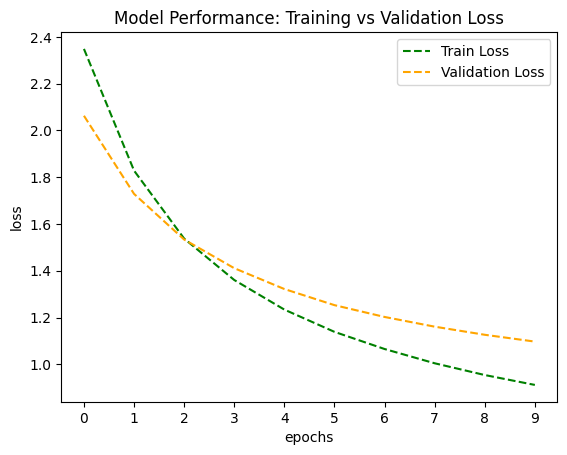

In [113]:
rclass.performance_plot()


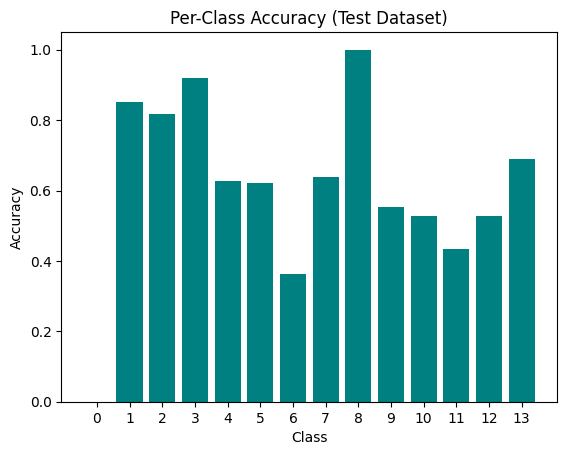

In [114]:
rclass.accuracy_x_class_plot()

In [115]:
seq_size = 119
simpleMLPmodel = SimpleMLP(input_size=seq_size*4,hidden_size=100)
rclass = ImplementDLEv(fastafile=nc_file, batch_size=128,num_workers=1, 
                 model = simpleMLPmodel, device="cpu", train_ratio = 0.7,
                 val_ratio = 0.15,test_ratio = 0.15,lr=0.001, num_epochs = 10, seq_length = seq_size,
                 subset = 0)

rclass.run_train()


Run Information
---------------
Epoch 1/10, Loss: 2.2103, Avg Batch Time: 0.0044s
Validation Loss: 1.7524, Validation Accuracy: 0.5200
Validation Class Accuracy:  [0, 0.769, 0.893, 0.889, 0.453, 0.691, 0.032, 0.193, 0.972, 0.764, 0.352, 0.0, 0.338, 0.211]
Epoch 2/10, Loss: 1.4603, Avg Batch Time: 0.0047s
Validation Loss: 1.3292, Validation Accuracy: 0.6076
Validation Class Accuracy:  [0, 0.846, 0.893, 0.931, 0.656, 0.716, 0.111, 0.687, 0.972, 0.375, 0.42, 0.091, 0.475, 0.474]
Epoch 3/10, Loss: 1.1205, Avg Batch Time: 0.0048s
Validation Loss: 1.1757, Validation Accuracy: 0.6350
Validation Class Accuracy:  [0, 0.897, 0.893, 0.958, 0.828, 0.407, 0.603, 0.554, 0.944, 0.528, 0.443, 0.182, 0.475, 0.461]
Epoch 4/10, Loss: 0.9322, Avg Batch Time: 0.0048s
Validation Loss: 1.0417, Validation Accuracy: 0.6698
Validation Class Accuracy:  [0, 0.885, 0.893, 0.944, 0.75, 0.531, 0.365, 0.663, 0.958, 0.542, 0.614, 0.295, 0.625, 0.487]
Epoch 5/10, Loss: 0.8137, Avg Batch Time: 0.0047s
Validation Loss: 

## **Conclusions**

Summarize what you could and could not conclude based on your experiments.
In this section, you can add **text**.



## **References**
You can add here the citations of books, websites, or academic papers, etc.